<a href="https://colab.research.google.com/github/georgeduranh/ML/blob/main/3_deep_learning/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt 

In [3]:
(train_data, train_label ), (test_data, test_label ) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
train_data.shape

(60000, 28, 28)

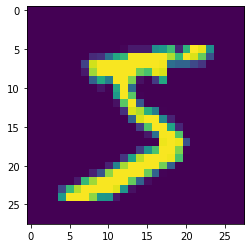

In [8]:
plt.imshow(train_data[0])

In [9]:
train_label[0]

5

In [12]:
## Neuran network
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation = 'softmax'))

In [22]:
model.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics = 'accuracy')

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [19]:
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

In [23]:
#Training
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2592 - accuracy: 0.9246
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1027 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0362 - accuracy: 0.9894


In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9755


[0.07728512585163116, 0.9754999876022339]